In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_text
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

# Classification

## Data Preparation
- prepare your data for the classification task
- decide a categorical variable to predict (`outcome_type` is the most natural for this dataset)
    - the target variable should transformed to numerical (0, 1, 2 ...)
- remove all the variable that are not necessary or "leak" information about your target.
- divide the dataset in train/test
- for each classifier perform the correct preprocessing.

In [2]:
df = pd.read_csv("C:\\Users\\ACER\\Desktop\\DMML\\versionepulitamed.csv", skipinitialspace=True, parse_dates=['date_of_birth','outcome_datetime', 'intake_datetime'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4487 entries, 0 to 4486
Data columns (total 68 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date_of_birth               4487 non-null   datetime64[ns]
 1   outcome_subtype             4487 non-null   object        
 2   outcome_type                4487 non-null   object        
 3   sex_upon_outcome            4487 non-null   object        
 4   outcome_datetime            4487 non-null   datetime64[ns]
 5   breed                       4487 non-null   object        
 6   color                       4487 non-null   object        
 7   found_location              4487 non-null   object        
 8   intake_condition            4487 non-null   object        
 9   intake_type                 4487 non-null   object        
 10  sex_upon_intake             4487 non-null   object        
 11  count                       4487 non-null   int64       

In [4]:
print(df['outcome_type'].unique())

['Adoption' 'Transfer' 'Euthanasia' 'Died' 'Missing' 'Return to Owner'
 'Disposal' 'Rto-Adopt']


In [5]:
print(df['outcome_type'].value_counts(normalize=True) * 100)

outcome_type
Transfer           62.870515
Adoption           21.729441
Euthanasia         10.184979
Return to Owner     4.189882
Died                0.824604
Missing             0.156006
Disposal            0.022287
Rto-Adopt           0.022287
Name: proportion, dtype: float64


Come si evince le classi della varibile outcome_type sono sbilanciate, prima di addestrare il modello è nceessario eliminare le feature rindondanti,quelle legate all'outucome_type e gestire questo sbilanciamento e gestire i colori con una nuova variabile che sia meno sparsa dell'one hot encoding

In [6]:
df. columns

Index(['date_of_birth', 'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'outcome_datetime', 'breed', 'color', 'found_location',
       'intake_condition', 'intake_type', 'sex_upon_intake', 'count',
       'intake_datetime', 'breed_category', 'Apricot', 'Black',
       'Black Brindle', 'Black Smoke', 'Blue', 'Blue Cream', 'Blue Merle',
       'Blue Tick', 'Blue Tiger', 'Brown', 'Brown Brindle', 'Brown Merle',
       'Brown Tiger', 'Buff', 'Chocolate', 'Cream', 'Fawn', 'Gold', 'Gray',
       'Liver', 'Liver Tick', 'Orange', 'Red', 'Red Merle', 'Red Tick',
       'Sable', 'Silver', 'Tan', 'Tortie', 'Tricolor', 'White', 'Yellow',
       'Yellow Brindle', 'Mixed_breed', 'breed_min_life_expectancy2',
       'breed_max_life_expectancy2', 'dog_age', 'length_of_stay',
       'playfulness2', 'similar_breed', 'good_with_children2',
       'good_with_other_dogs2', 'shedding2', 'grooming2', 'drooling2',
       'coat_length2', 'good_with_strangers2', 'protectiveness2',
       'trainabi

<Axes: >

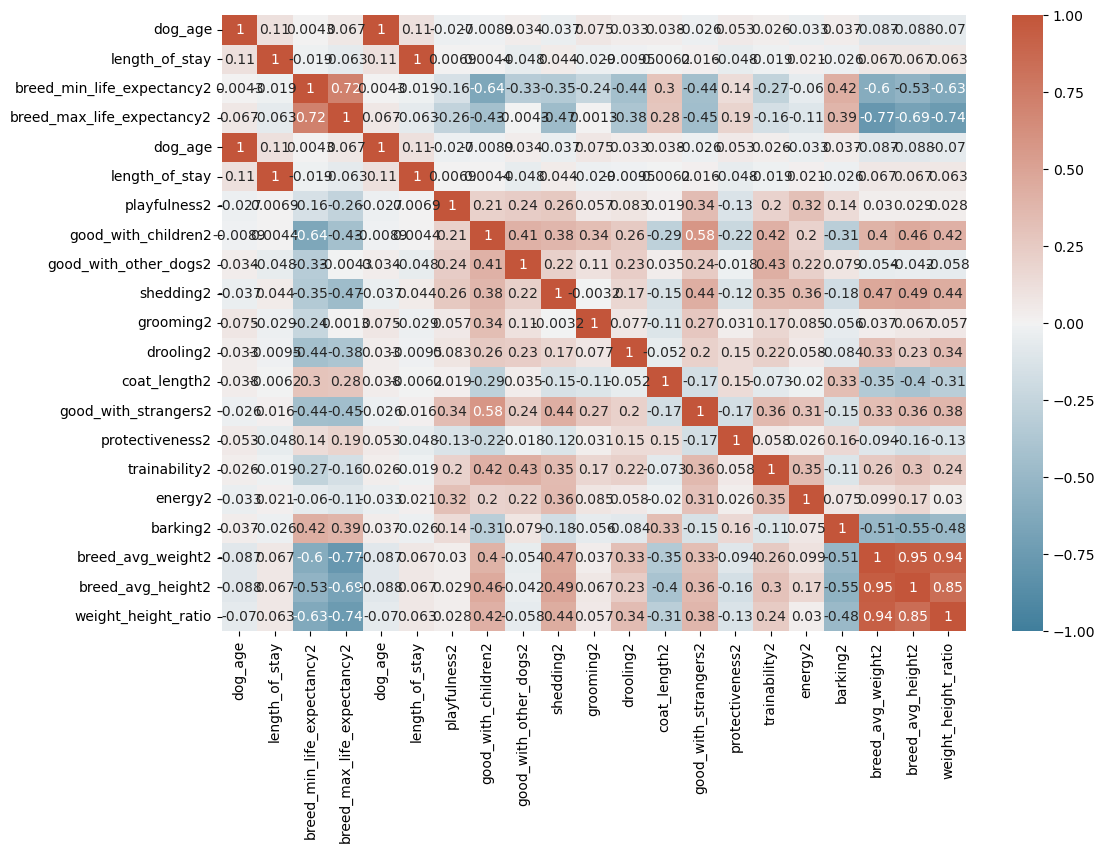

In [7]:
corr = df[[
           'dog_age',
       'length_of_stay',
        'breed_min_life_expectancy2',
       'breed_max_life_expectancy2', 'dog_age', 'length_of_stay',
       'playfulness2',  'good_with_children2',
       'good_with_other_dogs2', 'shedding2', 'grooming2', 'drooling2',
       'coat_length2', 'good_with_strangers2', 'protectiveness2',
       'trainability2', 'energy2', 'barking2', 'breed_avg_weight2',
       'breed_avg_height2', 'weight_height_ratio', ]].corr()
plt.figure(figsize=(12, 8)) 
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1, annot=True)

Per quanto riguarda le feature numeriche, ho trasformato l'aspettativa di vita in una media tra i valori minimi e massimi e ho rimosso le varibili legate al peso e all'altezza

In [8]:
df['breed_life_expectancy'] = (df[ 'breed_min_life_expectancy2'] + df['breed_max_life_expectancy2']) / 2
df = df.drop(columns=['breed_min_life_expectancy2', 'breed_max_life_expectancy2'])

<Axes: >

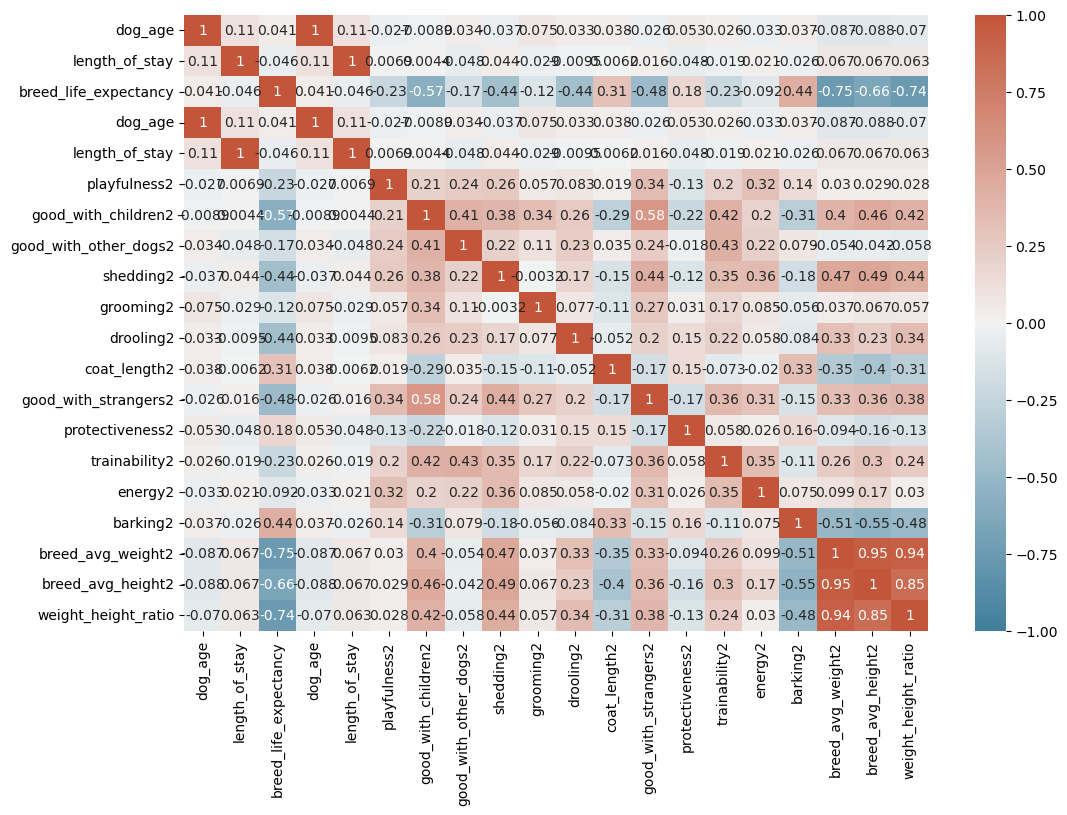

In [9]:
corr = df[[
           'dog_age',
       'length_of_stay','breed_life_expectancy', 'dog_age', 'length_of_stay',
       'playfulness2',  'good_with_children2',
       'good_with_other_dogs2', 'shedding2', 'grooming2', 'drooling2',
       'coat_length2', 'good_with_strangers2', 'protectiveness2',
       'trainability2', 'energy2', 'barking2', 'breed_avg_weight2',
       'breed_avg_height2', 'weight_height_ratio', ]].corr()
plt.figure(figsize=(12, 8)) 
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1, annot=True)

In [10]:
col_drop=['breed_avg_weight2',
       'breed_avg_height2']
df.drop(columns=col_drop)

,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,outcome_datetime,breed,color,found_location,intake_condition,intake_type,...,grooming2,drooling2,coat_length2,good_with_strangers2,protectiveness2,trainability2,energy2,barking2,weight_height_ratio,breed_life_expectancy
0,2017-03-08,Foster,Adoption,Intact Male,2017-05-09 07:48:00,Greyhound Mix,Tan,6016 Los Cielos in Travis (TX),Normal,Stray,...,0.365627,0.218111,0.396311,2.177002,3.390986,2.873580,4.167703,1.974363,2.241379,11.5
1,2016-07-03,Foster,Adoption,Spayed Female,2016-09-10 17:22:00,Boxer Mix,Brown/White,11719 Schiber Rd in Mustang Ridge (TX),Normal,Stray,...,2.324304,3.481632,1.720616,4.839427,3.144705,3.010407,4.231642,2.737943,2.708333,11.0
2,2010-02-10,Partner,Transfer,Intact Male,2018-03-01 16:27:00,Chihuahua Shorthair Mix,Red,2300 Scarborough in Austin (TX),Normal,Stray,...,0.217080,1.046249,1.507057,2.740278,3.620172,1.832087,2.834511,5.015286,0.769231,15.0
3,2006-10-22,Partner,Transfer,Neutered Male,2015-10-28 14:12:00,Pomeranian Mix,White/Black,9415 Rowlands Sayle Rd in Austin (TX),Normal,Stray,...,2.045838,0.475766,1.696648,2.523325,3.770284,3.482516,2.037904,3.420557,0.769231,14.0
4,2016-09-07,Partner,Transfer,Spayed Female,2017-09-16 16:01:00,Shih Tzu Mix,White/Brown,3909 N Interstate 35 Service Rd in Austin (TX),Normal,Stray,...,3.903627,0.360951,0.162845,3.372774,2.924166,4.698562,2.944130,2.754888,1.282051,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4482,2017-06-04,Unknown,Adoption,Spayed Female,2018-02-05 18:37:00,Chihuahua Longhair Mix,White/Red,Austin (TX),Normal,Owner Surrender,...,1.804318,1.302827,1.157518,3.539462,3.492189,3.672274,4.069702,3.274014,2.558140,13.0
4483,2016-08-04,Unknown,Return to Owner,Intact Female,2017-03-05 18:53:00,Pit Bull Mix,Black/White,Pevetoe St And Crownover St in Austin (TX),Normal,Stray,...,2.332269,1.217937,0.490648,2.051769,3.744065,2.582030,4.313444,2.962705,2.790698,12.5
4484,2016-08-09,Unknown,Adoption,Neutered Male,2017-08-13 17:33:00,Border Terrier Mix,White,Austin (TX),Normal,Stray,...,1.703815,0.997735,1.617410,3.406384,2.927087,3.864698,4.182412,1.842600,2.558140,13.0
4485,2005-04-16,Unknown,Return to Owner,Neutered Male,2015-07-30 17:32:00,Pit Bull,Chocolate/White,1156 Cesar Chavez in Austin (TX),Normal,Public Assist,...,2.035821,0.632689,0.389339,3.176811,3.074202,2.674413,4.363280,2.471878,2.790698,12.5


<Axes: >

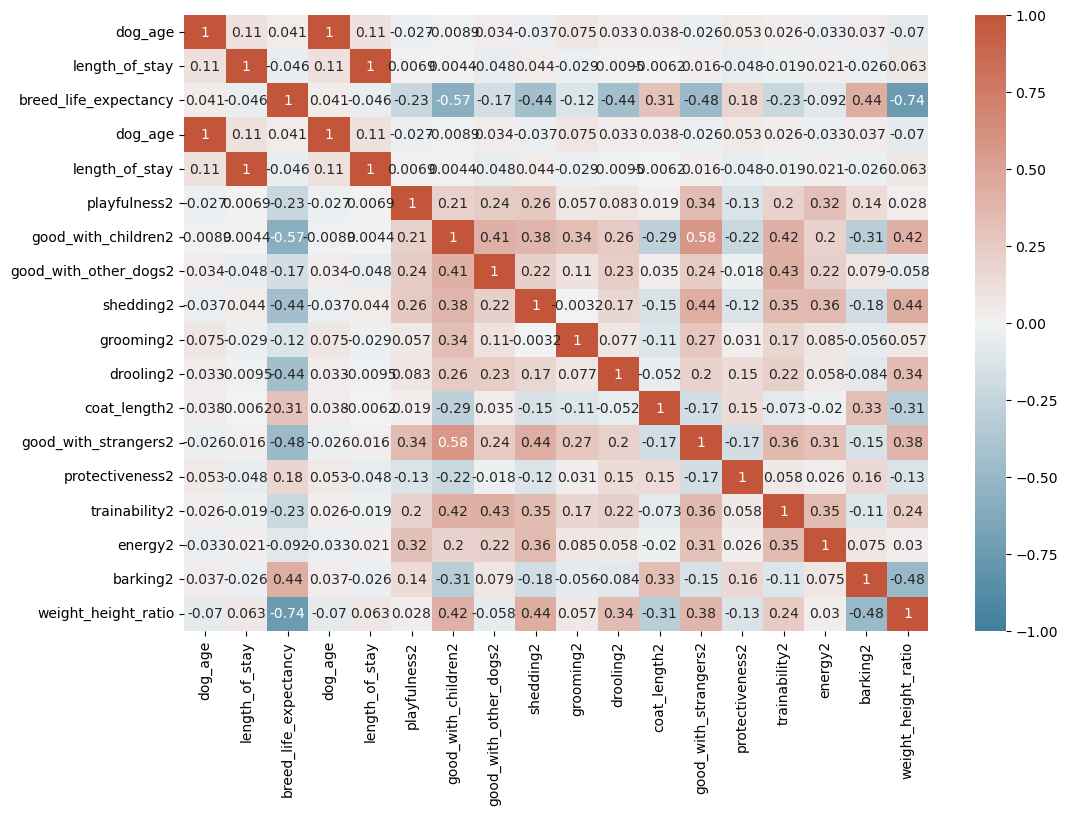

In [11]:
corr = df[[
           'dog_age',
       'length_of_stay','breed_life_expectancy', 'dog_age', 'length_of_stay',
       'playfulness2',  'good_with_children2',
       'good_with_other_dogs2', 'shedding2', 'grooming2', 'drooling2',
       'coat_length2', 'good_with_strangers2', 'protectiveness2',
       'trainability2', 'energy2', 'barking2', 'weight_height_ratio', ]].corr()
plt.figure(figsize=(12, 8)) 
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1, annot=True)

In [13]:
df.columns

Index(['date_of_birth', 'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'outcome_datetime', 'breed', 'color', 'found_location',
       'intake_condition', 'intake_type', 'sex_upon_intake', 'count',
       'intake_datetime', 'breed_category', 'Apricot', 'Black',
       'Black Brindle', 'Black Smoke', 'Blue', 'Blue Cream', 'Blue Merle',
       'Blue Tick', 'Blue Tiger', 'Brown', 'Brown Brindle', 'Brown Merle',
       'Brown Tiger', 'Buff', 'Chocolate', 'Cream', 'Fawn', 'Gold', 'Gray',
       'Liver', 'Liver Tick', 'Orange', 'Red', 'Red Merle', 'Red Tick',
       'Sable', 'Silver', 'Tan', 'Tortie', 'Tricolor', 'White', 'Yellow',
       'Yellow Brindle', 'Mixed_breed', 'dog_age', 'length_of_stay',
       'playfulness2', 'similar_breed', 'good_with_children2',
       'good_with_other_dogs2', 'shedding2', 'grooming2', 'drooling2',
       'coat_length2', 'good_with_strangers2', 'protectiveness2',
       'trainability2', 'energy2', 'barking2', 'breed_avg_weight2',
       'breed_a

In [14]:
df['log_weight_height_ratio'] = np.log1p(df['weight_height_ratio'])

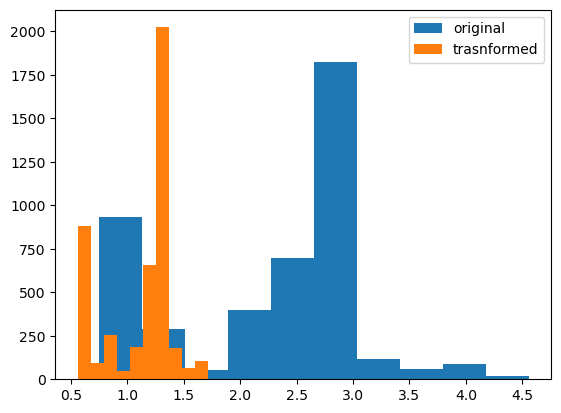

In [15]:
plt.hist(df['weight_height_ratio'],label='original')
plt.hist(df['log_weight_height_ratio'],label='trasnformed')
plt.legend()

La distribuzione ha dei picchi che sembrebbero indicare cani estremamente leggeri e altri massicci, con la trasformazone è migliorata l'uniformità della distribuzione.

In [16]:
df['log_length_of_stay'] = np.log1p(df['length_of_stay'])
df['log_dog_age'] = np.log1p(df['dog_age'])

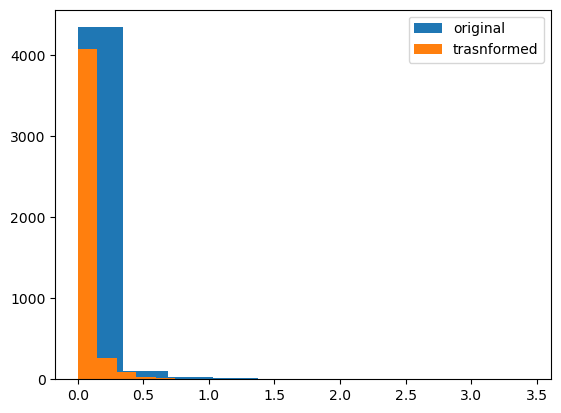

In [17]:
plt.hist(df['length_of_stay'],label='original')
plt.hist(df['log_length_of_stay'],label='trasnformed')
plt.legend()

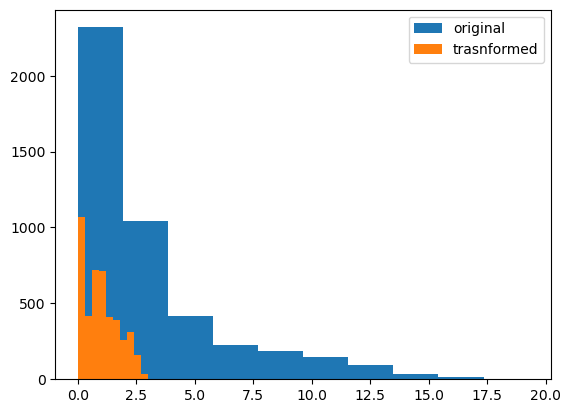

In [18]:
plt.hist(df['dog_age'],label='original')
plt.hist(df['log_dog_age'],label='trasnformed')
plt.legend()

Anche per le trasformazioni di  queste feature, ottengo delle distribuzioni più stabili, tra le colonne da eliminare ci saranno le originali degli anni e della durata di permanenza 

In [19]:
df.columns

Index(['date_of_birth', 'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'outcome_datetime', 'breed', 'color', 'found_location',
       'intake_condition', 'intake_type', 'sex_upon_intake', 'count',
       'intake_datetime', 'breed_category', 'Apricot', 'Black',
       'Black Brindle', 'Black Smoke', 'Blue', 'Blue Cream', 'Blue Merle',
       'Blue Tick', 'Blue Tiger', 'Brown', 'Brown Brindle', 'Brown Merle',
       'Brown Tiger', 'Buff', 'Chocolate', 'Cream', 'Fawn', 'Gold', 'Gray',
       'Liver', 'Liver Tick', 'Orange', 'Red', 'Red Merle', 'Red Tick',
       'Sable', 'Silver', 'Tan', 'Tortie', 'Tricolor', 'White', 'Yellow',
       'Yellow Brindle', 'Mixed_breed', 'dog_age', 'length_of_stay',
       'playfulness2', 'similar_breed', 'good_with_children2',
       'good_with_other_dogs2', 'shedding2', 'grooming2', 'drooling2',
       'coat_length2', 'good_with_strangers2', 'protectiveness2',
       'trainability2', 'energy2', 'barking2', 'breed_avg_weight2',
       'breed_a

In [20]:
from collections import Counter

In [21]:
all_colors = df['color'].dropna().str.split("/").sum()
color_counts = Counter(all_colors)
color_df = pd.DataFrame(color_counts.items(), columns=['Color', 'Count']).sort_values(by='Count', ascending=False)

In [22]:
print(color_df.head(180))

             Color  Count
2            White   2309
4            Black   1490
0              Tan    925
1            Brown    922
5    Brown Brindle    272
10        Tricolor    207
3              Red    192
12            Blue    183
17       Chocolate    139
6            Cream     90
8            Sable     89
15            Gray     83
13            Buff     79
9             Fawn     66
7           Yellow     58
11      Blue Merle     36
18   Black Brindle     25
21            Gold     23
14       Blue Tick     19
16        Red Tick     17
20          Silver     16
19     Brown Merle     16
24  Yellow Brindle      8
23       Red Merle      7
26         Apricot      5
29          Orange      4
30           Liver      4
22     Brown Tiger      3
28      Blue Tiger      2
32      Liver Tick      2
25          Tortie      1
27      Blue Cream      1
31     Black Smoke      1


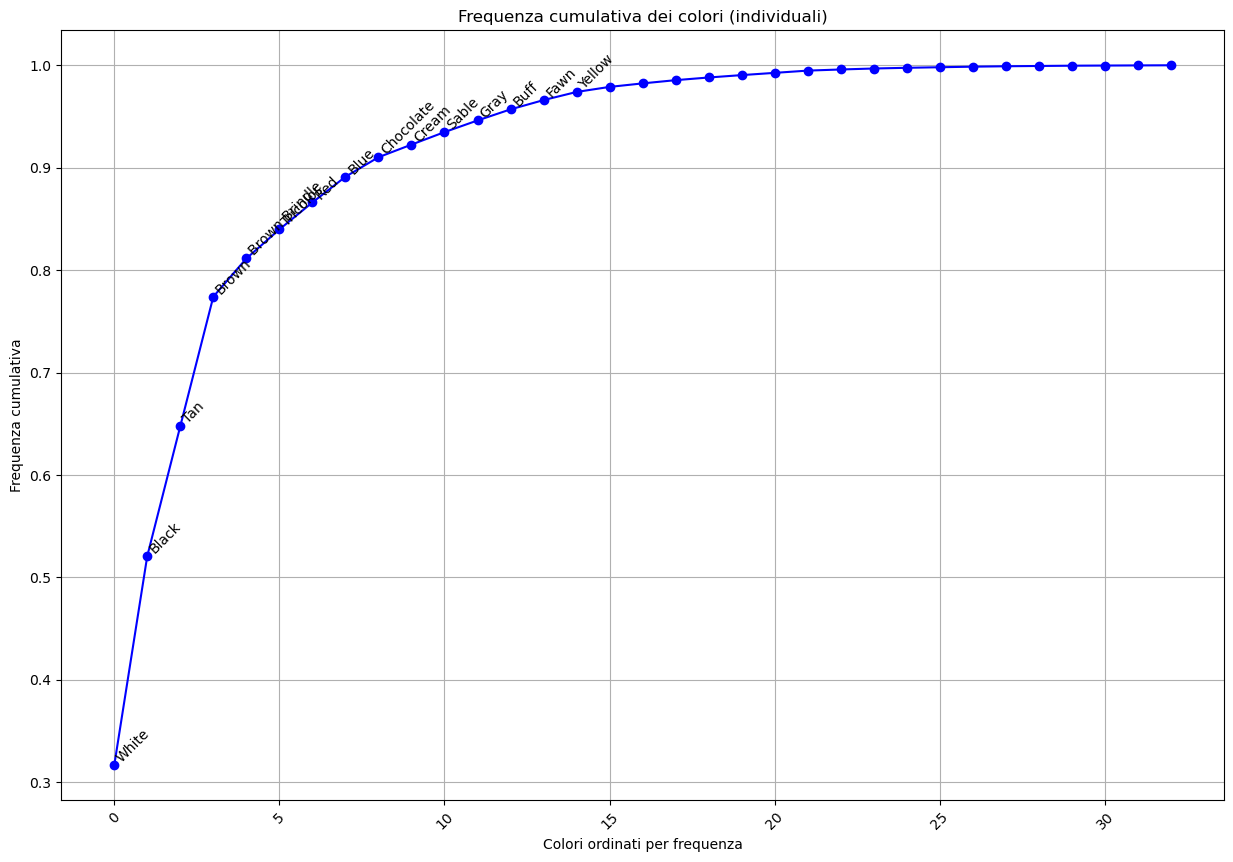

In [23]:
cumulative_freq = np.cumsum(color_df["Count"] / color_df["Count"].sum())
plt.figure(figsize=(15,10))
plt.plot(np.arange(0, len(color_df)), cumulative_freq, marker="o", linestyle="-", color="b")
num_labels = 15  
for i in range(min(num_labels, len(color_df))):
    plt.text(i, cumulative_freq.iloc[i], color_df.iloc[i, 0], fontsize=10, rotation=45, verticalalignment='bottom')
plt.xlabel("Colori ordinati per frequenza")
plt.ylabel("Frequenza cumulativa")
plt.title("Frequenza cumulativa dei colori (individuali)")
plt.xticks(rotation=45)
plt.grid()
plt.show()


I primi cinque colori rappresentano  più del 80% del dataset quindi per care una feature colori frequenti vs other seleziono solo questi per non avere dati troppo sparsi

In [24]:
common_colors = ['White', 'Black', ' Tan', ' Brown', 'Brown Brindle']
def is_common_color(color):
    if color in common_colors:
        return 1
    else:
        return 0

In [25]:
df['common_color'] = df['color'].apply(is_common_color)

In [26]:
print(df[['color', 'common_color']].head())

         color  common_color
0          Tan             0
1  Brown/White             0
2          Red             0
3  White/Black             0
4  White/Brown             0


In [27]:
print(df['common_color'].value_counts())

common_color
0    3893
1     594
Name: count, dtype: int64


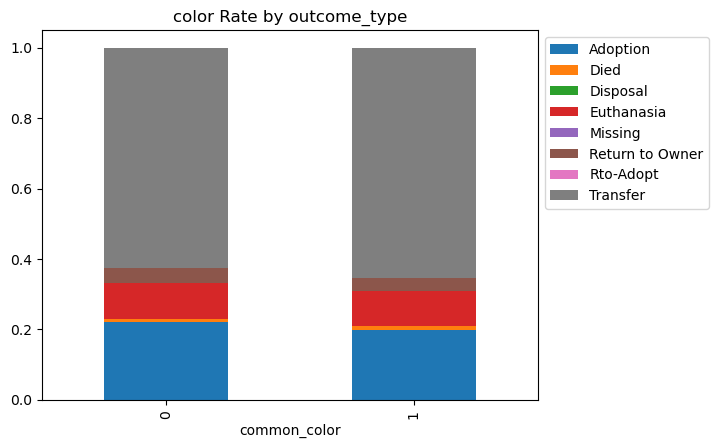

In [28]:
x='color'
y= 'outcome_type'

pc = pd.crosstab( df['common_color'],df['outcome_type'])
pcn = pc.div(pc.sum(1).astype(float), axis=0)
pcn.plot(kind='bar', stacked=True,title='%s Rate by %s' % (x, y))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Non c'è differenza di distrubzione dei colori in base all'otucome

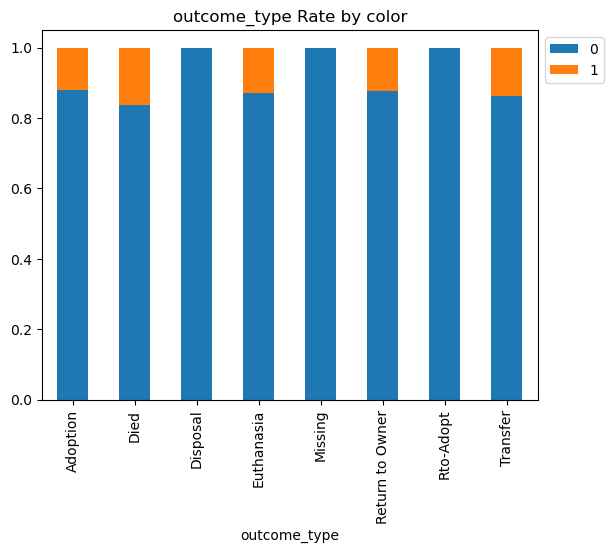

In [29]:

x= 'outcome_type'
y='color'

pc = pd.crosstab(df['outcome_type'],df['common_color'])
pcn = pc.div(pc.sum(1).astype(float), axis=0)
pcn.plot(kind='bar', stacked=True,title='%s Rate by %s' % (x, y))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Si nota lo stesso pattern di unofrmità del grafico precendente anche invertendo le feature sugli assi

Per capire se la variabile colore frequente vs raro abbia un'influenza sulla classificazione dell'outcome ho eseguito un test chi quadrato ed è risultato che le due variabili sono indipendenti.

Successivamente ho provato a dividere i colori in chiari e scuri, ma anche il chi quadrato delle feature relativa all'intensità del colore ha portato all'accettazione dell'ipotesi nulla di indipendenza delle due variabili, pertanto ho deciso di rimuovere tutte le varibili relative al colore che ho creato fino a questo momento.

In [30]:
contingency_table = pd.crosstab(df['common_color'], df['outcome_type'])

chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print('Chi-Quadrato: {}'.format(chi2_stat))
print('P-value: {}'.format(p_value))
print('Gradi di libertà: {}'.format(dof))



Chi-Quadrato: 3.614930052112184
P-value: 0.8229065550196659
Gradi di libertà: 7


In [31]:
dark_colors = ['Black', 'Brown', 'Chocolate', 'Liver']
light_colors = ['White', 'Cream', 'Apricot', 'Buff', 'Tan']

def classify_light_dark(color):
    if color in dark_colors:
        return 'Dark'
    elif color in light_colors:
        return 'Light'
    else:
        return 'Other'




In [32]:
df['color_shade'] = df['color'].apply(classify_light_dark)




In [33]:
df['color_shade_encoded'] = df['color_shade'].map({'Dark': 1, 'Light': 0, 'Other': 2})
print(df['color_shade'].value_counts())




color_shade
Other    3388
Dark      551
Light     548
Name: count, dtype: int64


In [34]:
contingency_table = pd.crosstab(df['color_shade_encoded'], df['outcome_type'])

chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print('Chi-Quadrato: {}'.format(chi2_stat))
print('P-value: {}'.format(p_value))
print('Gradi di libertà: {}'.format(dof))

Chi-Quadrato: 21.73698339232186
P-value: 0.08418262651468453
Gradi di libertà: 14


In [35]:
le = LabelEncoder()
df['breed_category_encoded'] = le.fit_transform(df['breed_category'])
label_mapping_breed = dict(zip(le.classes_, le.transform(le.classes_)))
print('Mapping delle Classi Outcome:', label_mapping_breed)



Mapping delle Classi Outcome: {'American Bulldog Mix': 0, 'American Staffordshire Terrier Mix': 1, 'Anatol Shepherd Mix': 2, 'Australian Cattle Dog Mix': 3, 'Australian Kelpie Mix': 4, 'Australian Shepherd Mix': 5, 'Beagle Mix': 6, 'Border Collie Mix': 7, 'Boxer Mix': 8, 'Chihuahua Shorthair': 9, 'Chihuahua Shorthair Mix': 10, 'Chihuahua Shorthair/Dachshund': 11, 'Chow Chow Mix': 12, 'Dachshund': 13, 'Dachshund Mix': 14, 'German Shepherd': 15, 'German Shepherd Mix': 16, 'Great Pyrenees Mix': 17, 'Labrador Retriever': 18, 'Labrador Retriever Mix': 19, 'Labrador Retriever/Pit Bull': 20, 'Miniature Schnauzer Mix': 21, 'Pit Bull': 22, 'Pit Bull Mix': 23, 'Plott Hound Mix': 24, 'Rottweiler Mix': 25, 'Shih Tzu': 26, 'Shih Tzu Mix': 27, 'Siberian Husky Mix': 28, 'Yorkshire Terrier Mix': 29, 'other': 30}


In questa sezione ho creato una variabile per la razza che poi ho scartato perchè era troppo sparsa

In [36]:
df.columns

Index(['date_of_birth', 'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'outcome_datetime', 'breed', 'color', 'found_location',
       'intake_condition', 'intake_type', 'sex_upon_intake', 'count',
       'intake_datetime', 'breed_category', 'Apricot', 'Black',
       'Black Brindle', 'Black Smoke', 'Blue', 'Blue Cream', 'Blue Merle',
       'Blue Tick', 'Blue Tiger', 'Brown', 'Brown Brindle', 'Brown Merle',
       'Brown Tiger', 'Buff', 'Chocolate', 'Cream', 'Fawn', 'Gold', 'Gray',
       'Liver', 'Liver Tick', 'Orange', 'Red', 'Red Merle', 'Red Tick',
       'Sable', 'Silver', 'Tan', 'Tortie', 'Tricolor', 'White', 'Yellow',
       'Yellow Brindle', 'Mixed_breed', 'dog_age', 'length_of_stay',
       'playfulness2', 'similar_breed', 'good_with_children2',
       'good_with_other_dogs2', 'shedding2', 'grooming2', 'drooling2',
       'coat_length2', 'good_with_strangers2', 'protectiveness2',
       'trainability2', 'energy2', 'barking2', 'breed_avg_weight2',
       'breed_a

In [37]:
col_drop=['date_of_birth', 'outcome_subtype', 'sex_upon_outcome',
       'outcome_datetime',  'color', 'found_location','breed','breed_category','similar_breed',
       'intake_condition', 'intake_type', 'sex_upon_intake', 'count',
       'intake_datetime',  'Apricot', 'Black',
       'Black Brindle', 'Black Smoke', 'Blue', 'Blue Cream', 'Blue Merle',
       'Blue Tick', 'Blue Tiger', 'Brown', 'Brown Brindle', 'Brown Merle',
       'Brown Tiger', 'Buff', 'Chocolate', 'Cream', 'Fawn', 'Gold', 'Gray',
       'Liver', 'Liver Tick', 'Orange', 'Red', 'Red Merle', 'Red Tick',
       'Sable', 'Silver', 'Tan', 'Tortie', 'Tricolor', 'White', 'Yellow',
       'Yellow Brindle', 'dog_age', 'length_of_stay', 'breed_avg_weight2',
       'breed_avg_height2','weight_height_ratio' ,
       'common_color', 'color_shade', 'color_shade_encoded']
df2=df.drop(columns=col_drop)

In [38]:
df2.head()

,outcome_type,Mixed_breed,playfulness2,good_with_children2,good_with_other_dogs2,shedding2,grooming2,drooling2,coat_length2,good_with_strangers2,protectiveness2,trainability2,energy2,barking2,breed_life_expectancy,log_weight_height_ratio,log_length_of_stay,log_dog_age,breed_category_encoded
0,Adoption,1,3.191688,2.625100,3.615374,3.506990,0.365627,0.218111,0.396311,2.177002,3.390986,2.873580,4.167703,1.974363,11.5,1.175999,0.080475,0.157647,30
1,Adoption,1,3.916796,5.835203,2.925542,1.663397,2.324304,3.481632,1.720616,4.839427,3.144705,3.010407,4.231642,2.737943,11.0,1.310583,0.084633,0.174813,8
2,Transfer,1,3.577027,2.544920,4.314612,3.359707,0.217080,1.046249,1.507057,2.740278,3.620172,1.832087,2.834511,5.015286,15.0,0.570545,0.014133,2.203804,10
3,Transfer,1,2.203599,2.835409,2.936067,3.165869,2.045838,0.475766,1.696648,2.523325,3.770284,3.482516,2.037904,3.420557,14.0,0.570545,0.016647,2.304936,30
4,Transfer,1,3.094009,4.391545,4.955892,0.172306,3.903627,0.360951,0.162845,3.372774,2.924166,4.698562,2.944130,2.754888,14.0,0.825075,0.011490,0.706303,27


In [39]:
print(df2.dtypes)

outcome_type                object
Mixed_breed                  int64
playfulness2               float64
good_with_children2        float64
good_with_other_dogs2      float64
shedding2                  float64
grooming2                  float64
drooling2                  float64
coat_length2               float64
good_with_strangers2       float64
protectiveness2            float64
trainability2              float64
energy2                    float64
barking2                   float64
breed_life_expectancy      float64
log_weight_height_ratio    float64
log_length_of_stay         float64
log_dog_age                float64
breed_category_encoded       int32
dtype: object


Nel creare le classi ho cercato un compromesso tra l'elevata numerosità di Transfer e le similutudini tra il tipo di outcome unendo i  tipi relativi all'adozione con il ritorno dal proprietario.

In [40]:
outcome_mapping = {
    'Transfer': 'Transfer',
    'Adoption': 'With_Owner',
    'Rto-Adopt': 'With_Owner',
    'Return to Owner': 'With_Owner',
    'Died': 'Not_Available',
    'Missing': 'Not_Available',
    'Disposal': 'Not_Available',
    'Euthanasia': 'Not_Available'
}
df2['outcome_grouped'] = df2['outcome_type'].map(outcome_mapping)




In [41]:

print(df2['outcome_grouped'].value_counts(normalize=True))

outcome_grouped
Transfer         0.628705
With_Owner       0.259416
Not_Available    0.111879
Name: proportion, dtype: float64


In [42]:
le = LabelEncoder()
df2['outcome_encoded'] = le.fit_transform(df2['outcome_grouped'])
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print( label_mapping)


{'Not_Available': 0, 'Transfer': 1, 'With_Owner': 2}


In [43]:
print(df2.dtypes)

outcome_type                object
Mixed_breed                  int64
playfulness2               float64
good_with_children2        float64
good_with_other_dogs2      float64
shedding2                  float64
grooming2                  float64
drooling2                  float64
coat_length2               float64
good_with_strangers2       float64
protectiveness2            float64
trainability2              float64
energy2                    float64
barking2                   float64
breed_life_expectancy      float64
log_weight_height_ratio    float64
log_length_of_stay         float64
log_dog_age                float64
breed_category_encoded       int32
outcome_grouped             object
outcome_encoded              int32
dtype: object


In [44]:
df2=df2.drop(columns=['outcome_type','outcome_grouped'])

In [45]:
df2.columns

Index(['Mixed_breed', 'playfulness2', 'good_with_children2',
       'good_with_other_dogs2', 'shedding2', 'grooming2', 'drooling2',
       'coat_length2', 'good_with_strangers2', 'protectiveness2',
       'trainability2', 'energy2', 'barking2', 'breed_life_expectancy',
       'log_weight_height_ratio', 'log_length_of_stay', 'log_dog_age',
       'breed_category_encoded', 'outcome_encoded'],
      dtype='object')

In [46]:
X = df2.drop(columns=['outcome_encoded']).values
y = df2['outcome_encoded'].values


In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [131]:
df2.to_csv('versionepulitalog.csv', index=False)

Ho salvato il dataframe per riutilizzarlo nel notebook del clustering

## Dummy
It's always a good idea to understand how well a naive model performs. You can use the DummyClassifier for that. If your next model do worse than naive... well, you may have a problem!

In [49]:
from sklearn.dummy import DummyClassifier

In [50]:
clf = DummyClassifier()

In [51]:
clf.fit(X_train, y_train)

DummyClassifier()

In [52]:
y_pred = clf.predict(X_test)

In [53]:
print(classification_report(y_test, y_pred,zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       151
           1       0.63      1.00      0.77       847
           2       1.00      0.00      0.00       349

    accuracy                           0.63      1347
   macro avg       0.88      0.33      0.26      1347
weighted avg       0.77      0.63      0.49      1347



In [54]:
print("Classi nel test set:", np.unique(y_test))
print("Classi predette:", np.unique(y_pred))

Classi nel test set: [0 1 2]
Classi predette: [1]


Il dummy fallisce nel predirela Classe 0 e la 2

## Decision Tree
- find the best parameters
- evaluate the performance of your model (with the correct metrics and plots)
- plot the decision tree and try to interpret it. Which are the most important features?

In [55]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                    test_size=0.3, 
                                                    random_state=0,
                                                    stratify=y_train
                                                   )

In [56]:
max_depth_list = [2, 3, 4, 5, 6, 7, 8, 9, 10, None]

accuracy_list_val = list()
accuracy_list_train = list()

for max_depth in max_depth_list:
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    clf.fit(X_train, y_train)
    y_pred_val = clf.predict(X_val)
    y_pred_train = clf.predict(X_train)
    
    accuracy_list_val.append(accuracy_score(y_val, y_pred_val))
    accuracy_list_train.append(accuracy_score(y_train, y_pred_train))

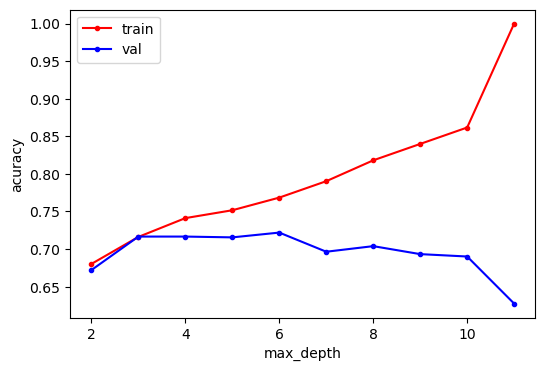

In [57]:
plt.figure(figsize=(6, 4))
max_depth_list_plot = np.arange(2, 12)
plt.plot(max_depth_list_plot, accuracy_list_train, label='train', marker='.', c='r')
plt.plot(max_depth_list_plot, accuracy_list_val, label='val', marker='.', c='b')

plt.ylabel('acuracy')
plt.xlabel('max_depth')
plt.legend()
plt.show()

I valori ideali per sembrerebbero tra 5 e 6 per evitare sia l'undefitting che l'overfitting.

Provo a usare GridSearchCV per avere una stima dei parametri esaustiva

In [58]:
%%time
param_grid = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, None],
    'min_samples_split': [2, 5, 10, 20, 50], 
    'min_samples_leaf': [1, 3, 5, 10, 20], 
    'min_impurity_decrease': [0.0, 0.001, 0.01, 0.1, 0.2],
    'ccp_alpha': [0.0, 0.001, 0.01, 0.1, 0.2, 1],
}



clf = DecisionTreeClassifier(random_state=0)

gs = GridSearchCV(clf, param_grid=param_grid, cv=10, refit=True, scoring='accuracy')

gs.fit(X_train, y_train)

CPU times: total: 28min 30s
Wall time: 28min 42s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'ccp_alpha': [0.0, 0.001, 0.01, 0.1, 0.2, 1],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                         'min_impurity_decrease': [0.0, 0.001, 0.01, 0.1, 0.2],
                         'min_samples_leaf': [1, 3, 5, 10, 20],
                         'min_samples_split': [2, 5, 10, 20, 50]},
             scoring='accuracy')

In [59]:
best_clf = gs.best_estimator_

In [60]:
best_clf

DecisionTreeClassifier(max_depth=7, min_samples_leaf=20, random_state=0)

In [61]:
gs.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'gini',
 'max_depth': 7,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 20,
 'min_samples_split': 2}

In [62]:
y_pred = best_clf.predict(X_test)

In [63]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.507     0.238     0.324       151
           1      0.736     0.881     0.802       847
           2      0.622     0.467     0.534       349

    accuracy                          0.702      1347
   macro avg      0.622     0.529     0.553      1347
weighted avg      0.681     0.702     0.679      1347



A differenza del dummy Classifier il modello predice tutte e tre le classi.

I punteggi  per la precision e la recall sono più alti per la classse 1 e pessimi per la Classe 0.

Il miglioramento della perfomance potrebbe essere dovuto dal fatto che la classe 1 ha una numerosità maggiore rispetto alle altre

In [64]:
classes=best_clf.classes_,

In [65]:
best_clf.feature_importances_

array([0.        , 0.02269835, 0.01618451, 0.05496862, 0.04824134,
       0.        , 0.01252239, 0.01155315, 0.00347584, 0.01245476,
       0.01821087, 0.00141317, 0.        , 0.        , 0.04280741,
       0.56648462, 0.18284382, 0.00614116])

In [66]:
df2.columns

Index(['Mixed_breed', 'playfulness2', 'good_with_children2',
       'good_with_other_dogs2', 'shedding2', 'grooming2', 'drooling2',
       'coat_length2', 'good_with_strangers2', 'protectiveness2',
       'trainability2', 'energy2', 'barking2', 'breed_life_expectancy',
       'log_weight_height_ratio', 'log_length_of_stay', 'log_dog_age',
       'breed_category_encoded', 'outcome_encoded'],
      dtype='object')

In [67]:
columns = df2.columns[:-1].values

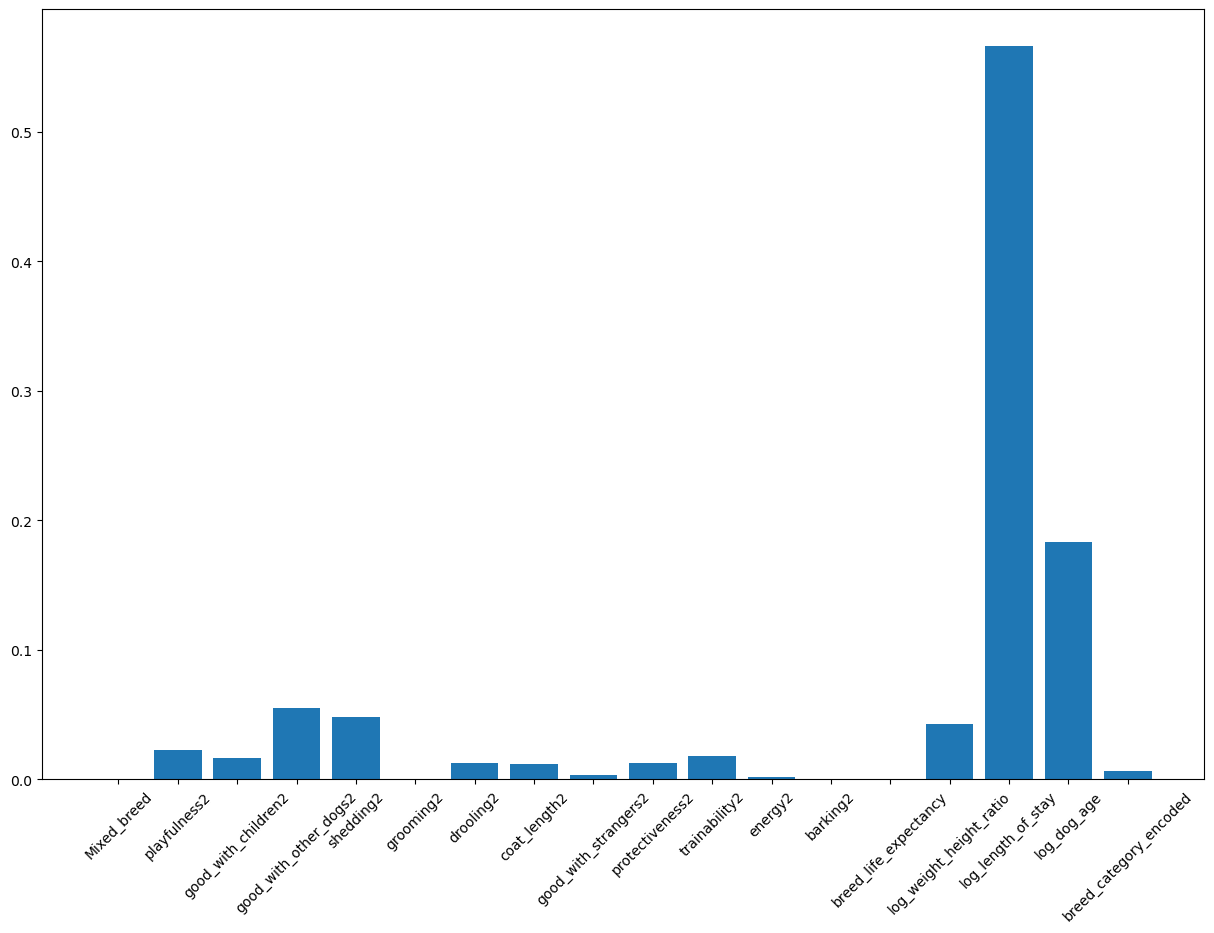

In [68]:
plt.figure(figsize=(15,10))
plt.bar(columns, best_clf.feature_importances_)
plt.xticks(rotation=45)
plt.show()

Come si evince dal grafico le variabili più importanti per predire l'outcome sono l'età del cane e la sua grandezza, seguite dalla socievolezza con i bambini e gli altri cani

Legenda Classi:  

Not_Available = Classe 0 

Transfer= Classe 1 

With_Owner= Classe 2


In [69]:
print(export_text(best_clf, feature_names=columns))

|--- log_length_of_stay <= 0.06
|   |--- log_length_of_stay <= 0.00
|   |   |--- log_dog_age <= 0.38
|   |   |   |--- good_with_strangers2 <= 3.47
|   |   |   |   |--- class: 1
|   |   |   |--- good_with_strangers2 >  3.47
|   |   |   |   |--- class: 1
|   |   |--- log_dog_age >  0.38
|   |   |   |--- playfulness2 <= 3.59
|   |   |   |   |--- class: 0
|   |   |   |--- playfulness2 >  3.59
|   |   |   |   |--- class: 0
|   |--- log_length_of_stay >  0.00
|   |   |--- log_dog_age <= 0.72
|   |   |   |--- log_length_of_stay <= 0.05
|   |   |   |   |--- log_length_of_stay <= 0.01
|   |   |   |   |   |--- log_dog_age <= 0.66
|   |   |   |   |   |   |--- good_with_other_dogs2 <= 2.32
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- good_with_other_dogs2 >  2.32
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- log_dog_age >  0.66
|   |   |   |   |   |   |--- log_dog_age <= 0.70
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- log_d

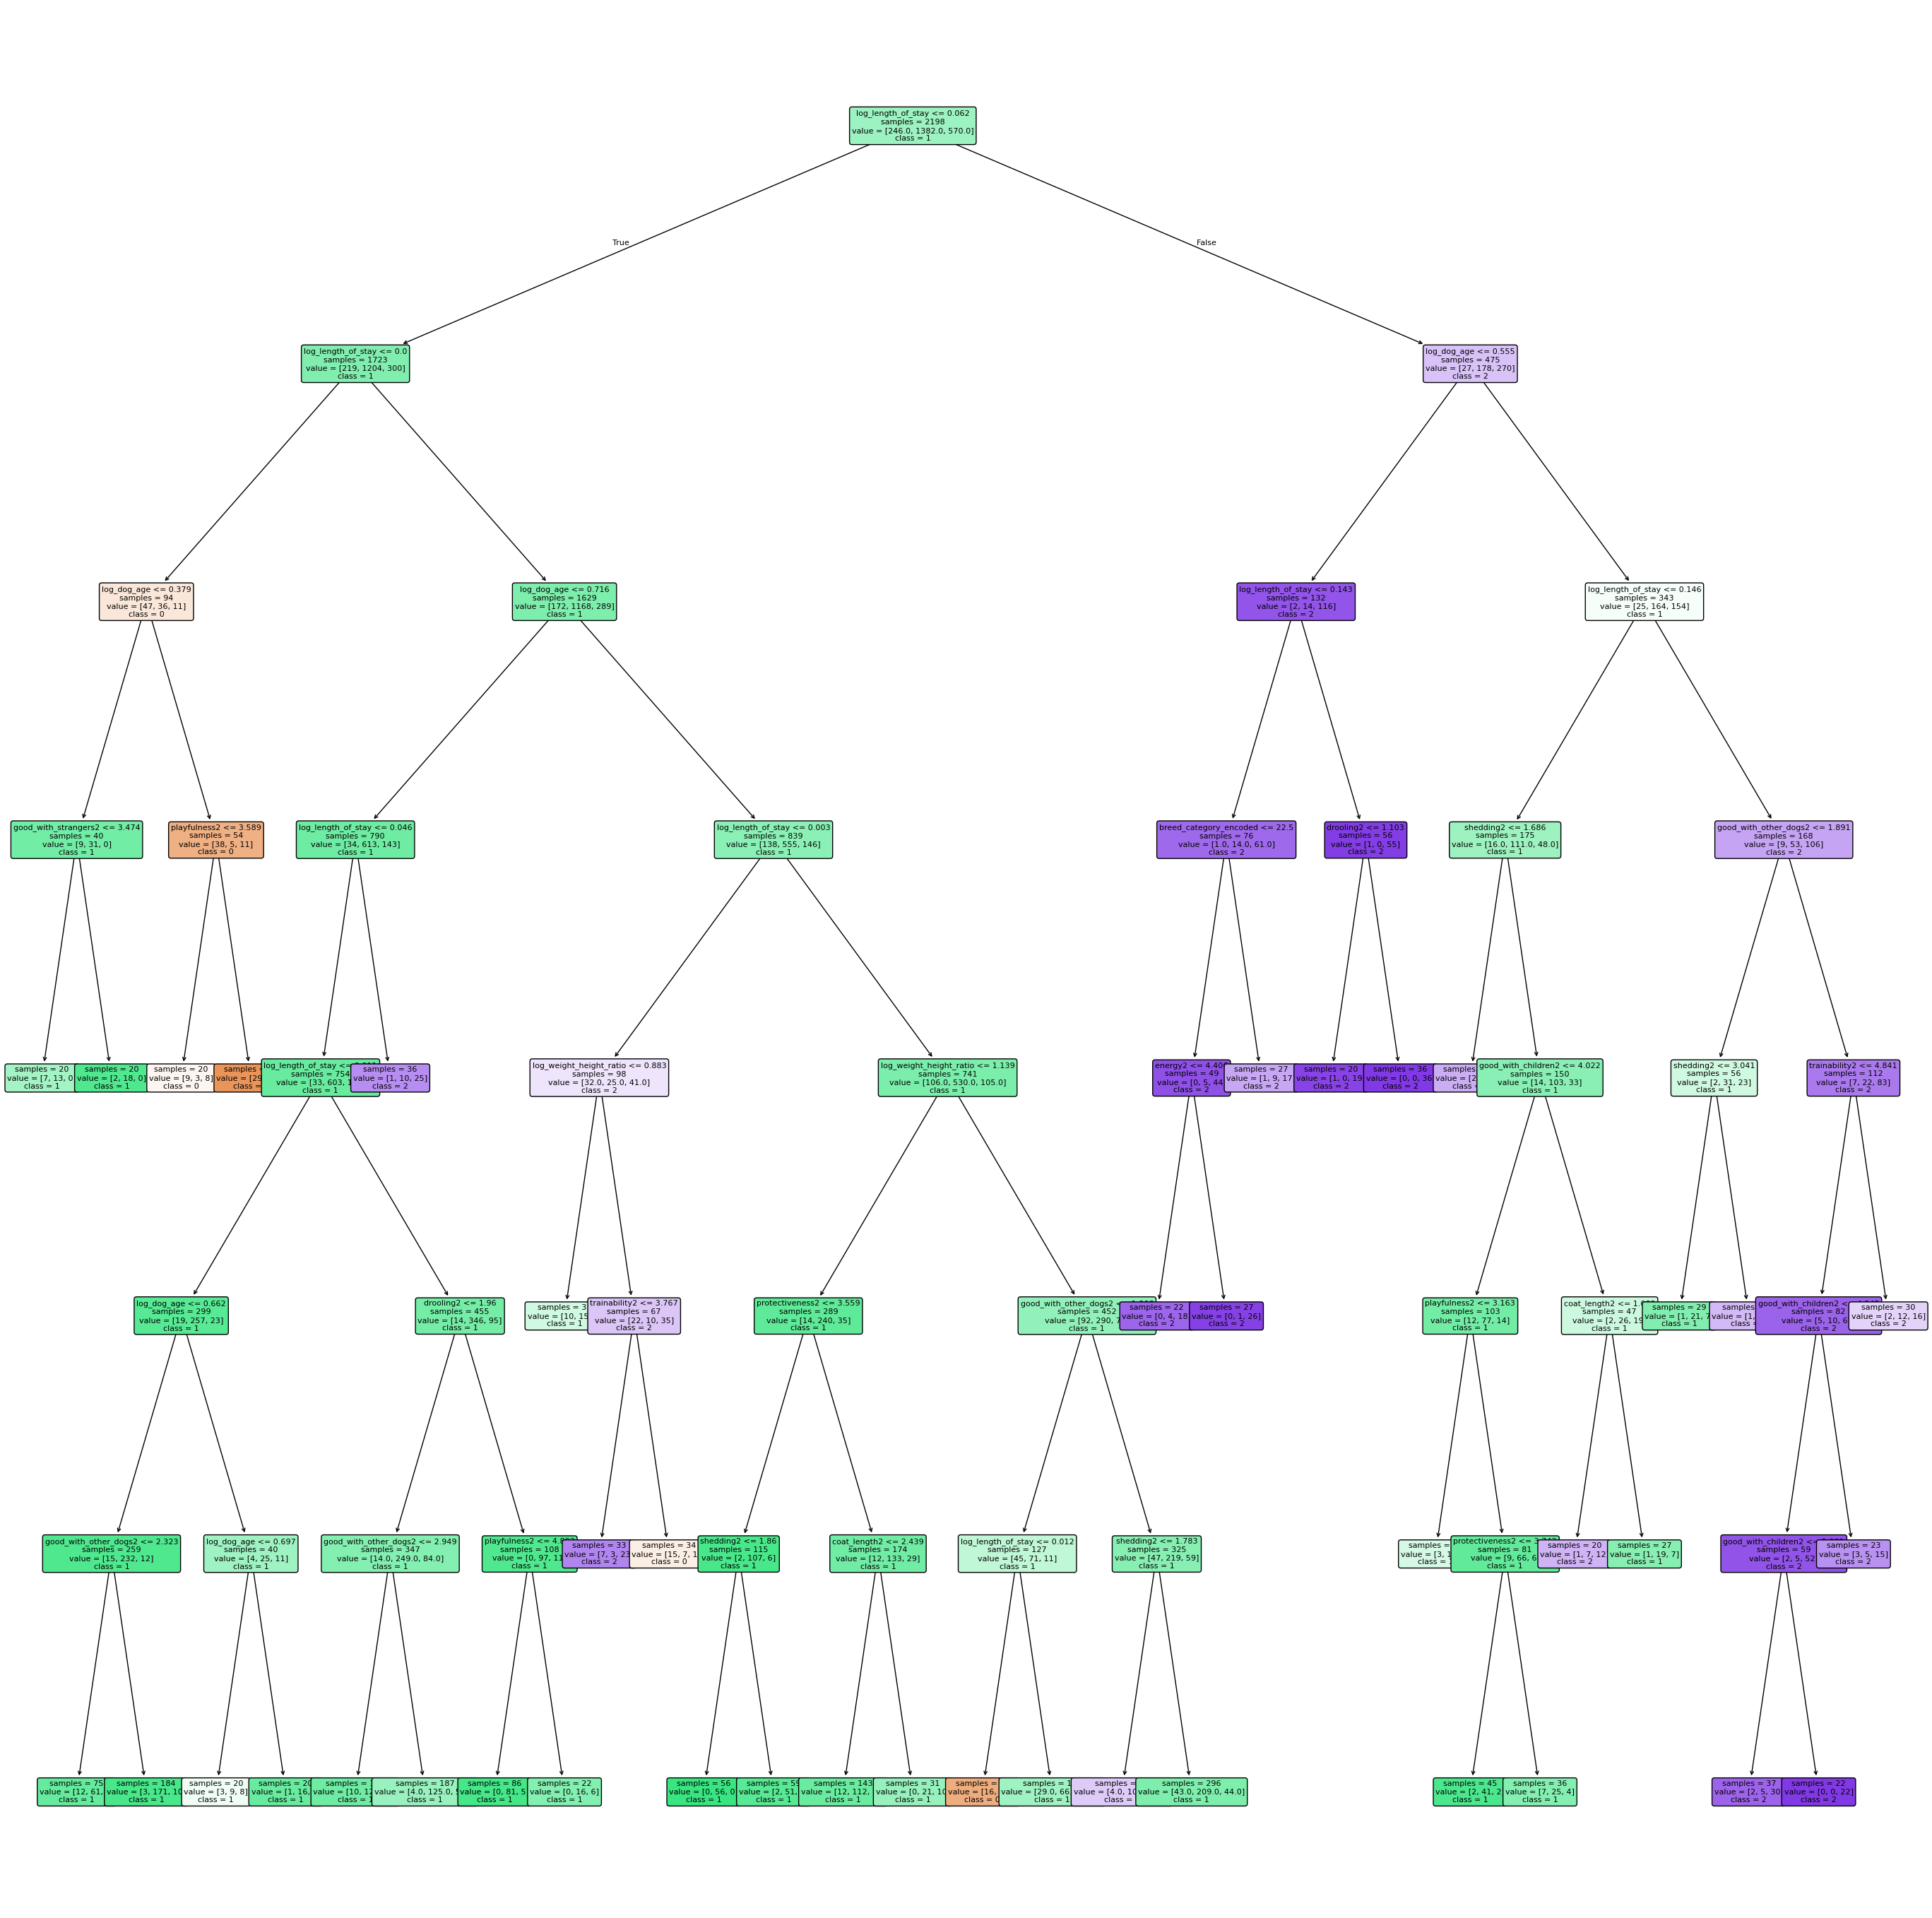

In [70]:
class_names = [str(c) for c in best_clf.classes_]
plt.figure(figsize=(35, 35)) 
plot_tree(best_clf, 
          feature_names=columns, 
          class_names=class_names, 
          filled=True, 
          rounded=True, 
          impurity=False, 
          fontsize=8)
plt.show()

Per ragioni di leggibilità ho limitato la profondità

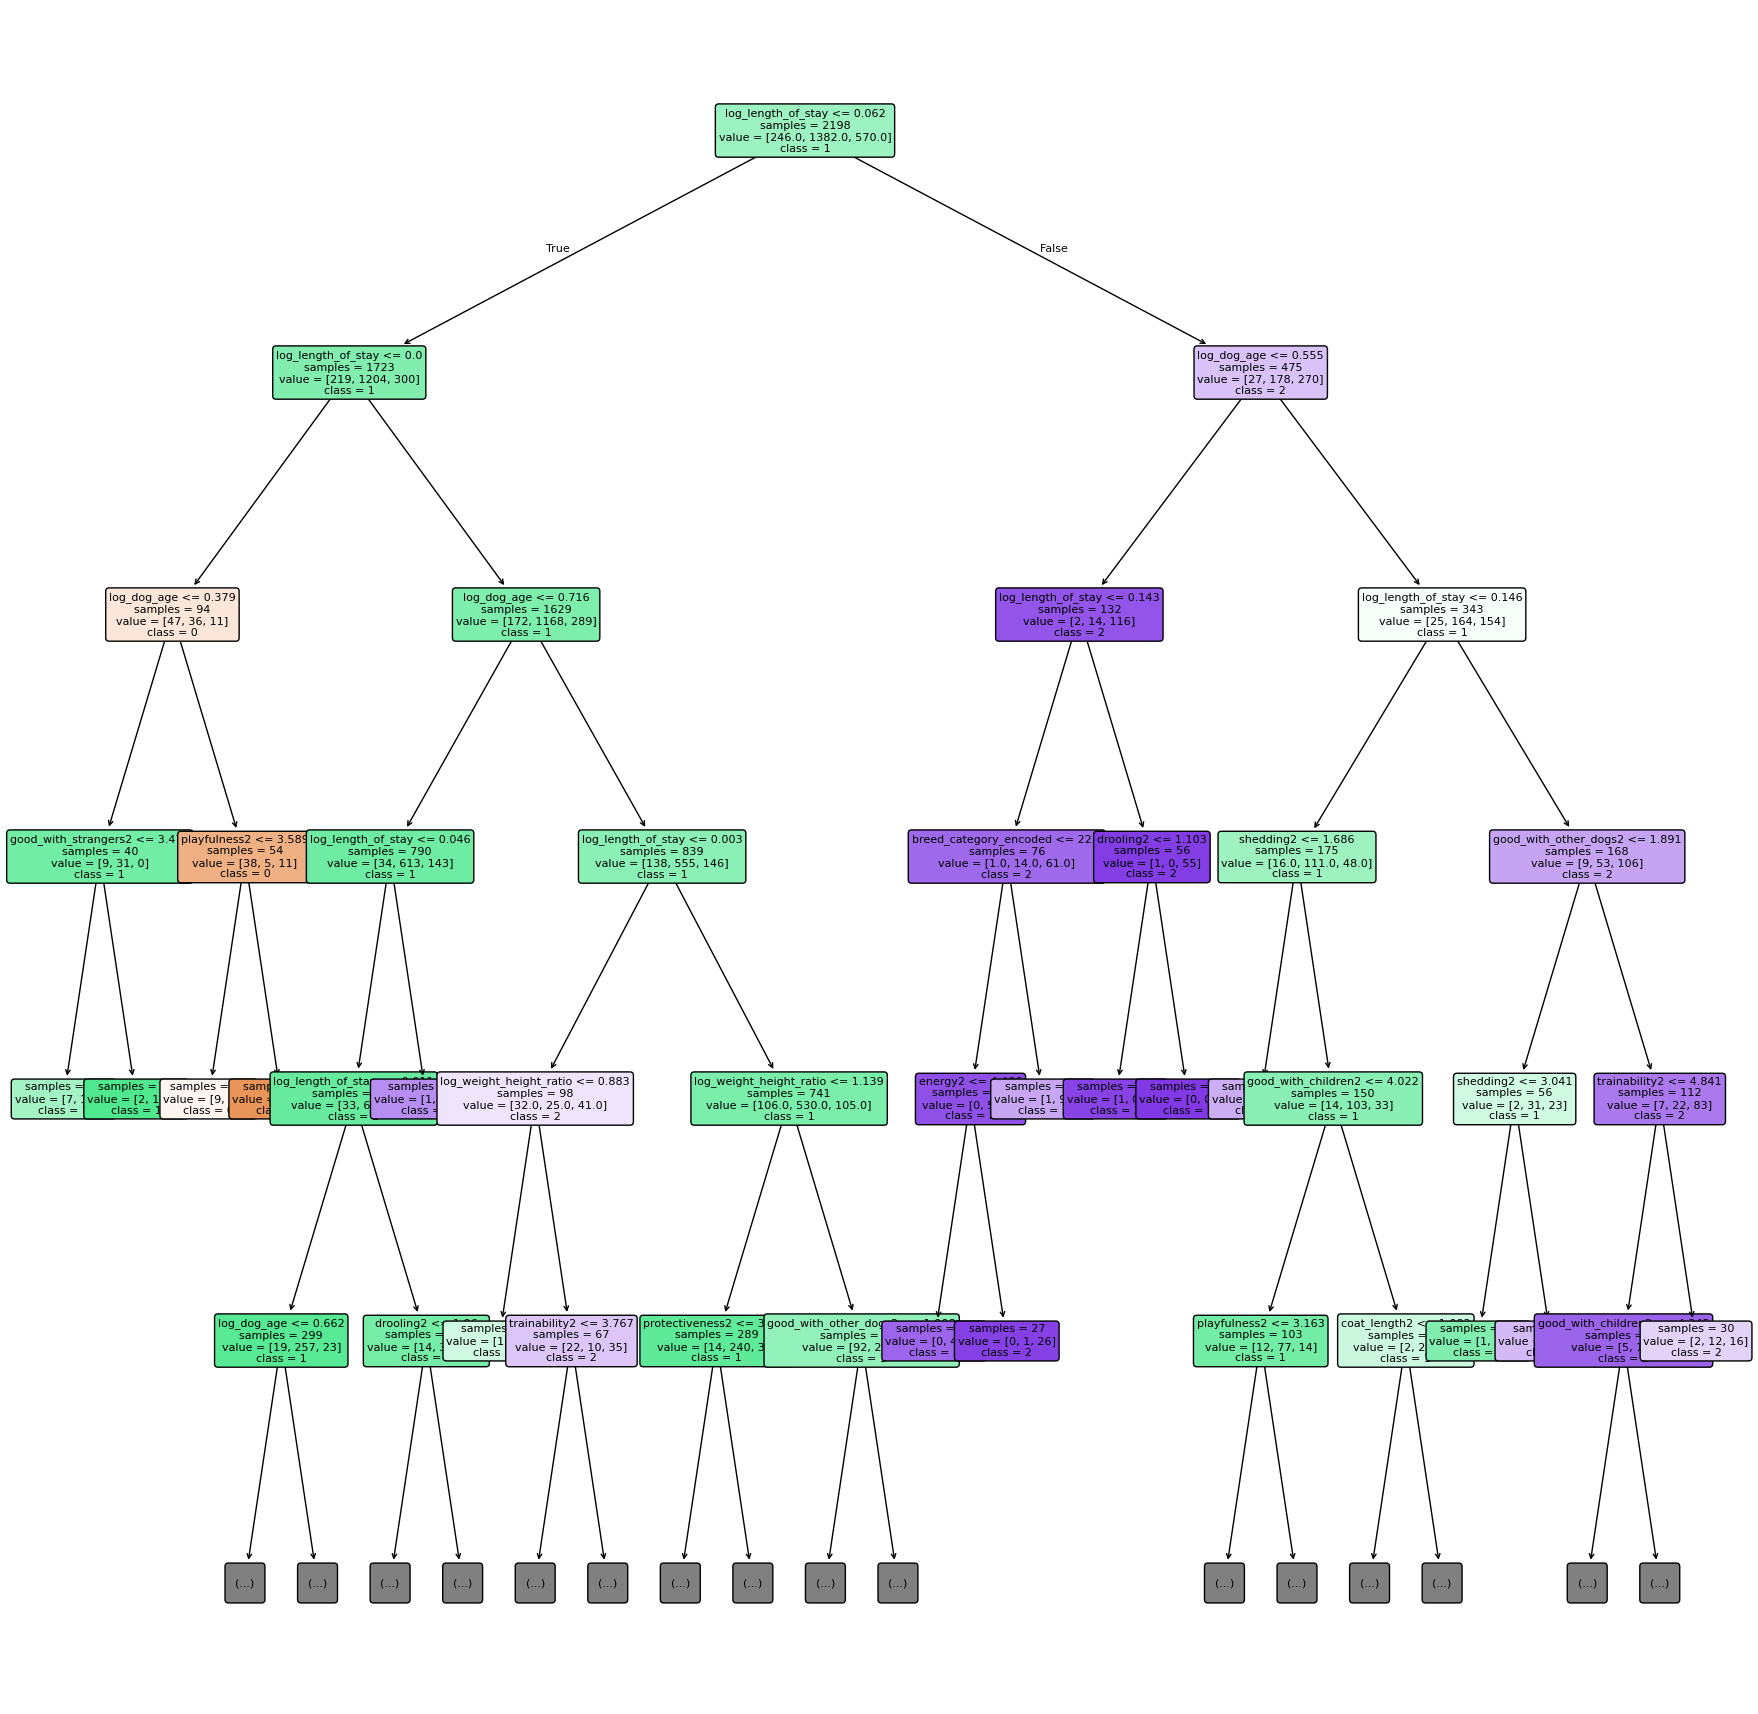

In [71]:
class_names = [str(c) for c in best_clf.classes_]
plt.figure(figsize=(22, 22)) 
plot_tree(best_clf, max_depth=5,
          feature_names=columns, 
          class_names=class_names, 
          filled=True, 
          rounded=True, 
          impurity=False, 
          fontsize=8)
plt.show()

L'albero decisionale evidenzia che le variabili più importanti hanno il maggiore impatto sulla decisione del modello sono la lunghezza della permanenza nel rifugio(log_length_of_stay), l'età (log_dog_age), la socievolezza  con  gli estranei (good_with_strangers2) e gli altri cani (good_with_other_dogs2), l'addestrabilità(trainbility2),l'energia(energy2) e la perdita di pelo(shedding2).

Ad esempio se un cane ha una permanenza molto breve nel rifugio (log_length_of_stay <= 0.00) e un'età inferiore (log_dog_age < 0.38), il modello guarda la socievolezza con gli estranei (good_with_strangers2). Se questo valore è basso (<= 3.47), allora il cane viene assegnato alla classe 1 cioè viene trasferito.



## KNN
- find the best k parameter and the best distance. show how performance varies depending on k
- evaluate the performance of your best model using the correct plots

In [72]:
%%time
k_values = range(1, 31) 
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy') 
    accuracy_scores.append(scores.mean())

best_k = k_values[np.argmax(accuracy_scores)]
print('Miglior K: {}'.format(best_k))



Miglior K: 22
CPU times: total: 14.2 s
Wall time: 2.49 s


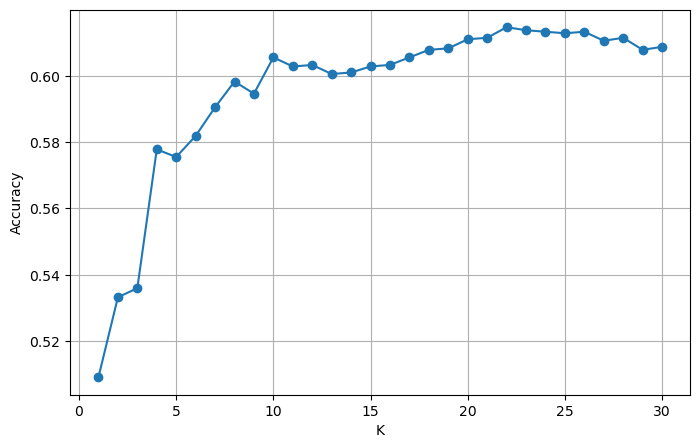

In [73]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

Come si evince dal grafico l'accuracy più alta (intorno a 0.62-0.65) è data da k=23

In [74]:
distances = ['euclidean', 'manhattan', 'minkowski']
results = {}

for dist in distances:
    knn = KNeighborsClassifier(n_neighbors=best_k, metric=dist)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    results[dist] = scores.mean()

for dist, score in results.items():
    print('{}: {}'.format(dist,score))

euclidean: 0.6146492320464924
manhattan: 0.6150975508509755
minkowski: 0.6146492320464924


 Manatthan distance è la metrica migliore

In [75]:
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric=dist)
best_knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=22)

In [76]:
y_pred = best_knn.predict(X_test)


In [77]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.50      0.01      0.01       151
           1       0.64      0.93      0.76       847
           2       0.38      0.11      0.18       349

    accuracy                           0.62      1347
   macro avg       0.51      0.35      0.32      1347
weighted avg       0.56      0.62      0.52      1347



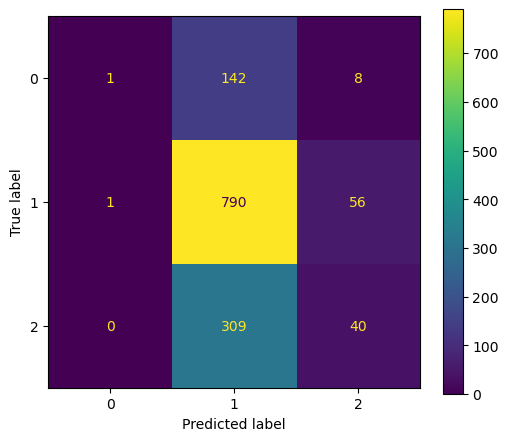

In [78]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
fig, ax = plt.subplots(figsize=(6,5))
disp.plot(ax=ax, values_format='d')
plt.show()

Il modello risente dello sbilanciamento delle classi. 

In particolare fallisce nel prevedere la classe 0 come si evince anche dai bassi punteggi nelle mettriche di recall e f1.

Il modello predice in maniera ottimale la Clase 1 (recall= 0.93, precision=0.64. f1=0.76). 

Per quanto riguarda la classe 2 (recall=0.11), il modello confonde questa classe con la 1.

## Random Forest
- find the best parameters
- evaluate model performance
- (optional) find the most important features (`clf.feature_importances_`)

Per scegliere la configurazione di parametri ottimali ho adoperato sia la GridSearchCV per la sua esaustività nella ricerca sia una RandomizedSearchCV.

Come si evince dalle configurazioni ottenute e testate non c'è differenza tra le loro metriche nè tra le feature più importanti, nonostante il cambiamento di alcuni parametri.

In [79]:
%%time
param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [5, 10, 20, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 5],  
    'criterion': ['gini', 'entropy']  
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print( grid_search.best_params_)




{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
CPU times: total: 4.8 s
Wall time: 2min 52s


In [80]:
best_rf = grid_search.best_estimator_

In [81]:
y_pred = best_rf.predict(X_test)



In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.14      0.23       151
           1       0.72      0.95      0.82       847
           2       0.78      0.45      0.57       349

    accuracy                           0.73      1347
   macro avg       0.72      0.51      0.54      1347
weighted avg       0.73      0.73      0.69      1347



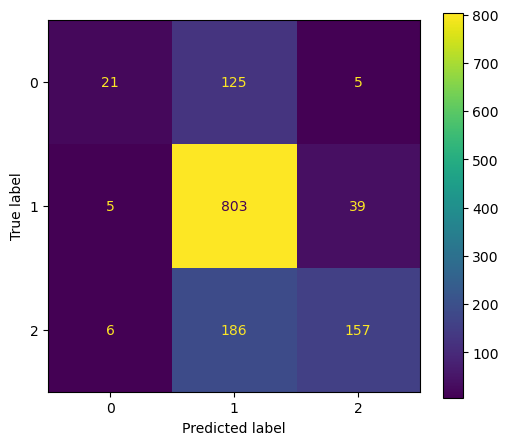

In [83]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
fig, ax = plt.subplots(figsize=(6,5))
disp.plot(ax=ax, values_format='d')
plt.show()

In [84]:
best_rf.feature_importances_

array([0.00280455, 0.04613093, 0.04381536, 0.05603671, 0.05056934,
       0.0485974 , 0.04588235, 0.04592218, 0.04937442, 0.05045085,
       0.04954643, 0.04143833, 0.0488947 , 0.01823813, 0.03238509,
       0.22953064, 0.12153459, 0.01884797])

In [85]:
columns_rf = df2.columns[:-1].values


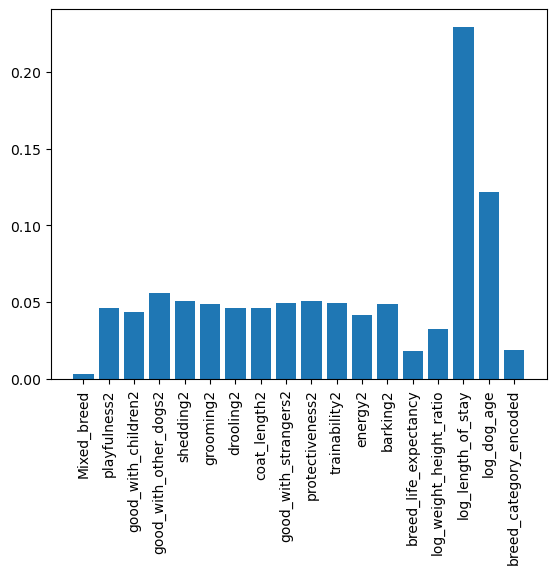

In [86]:
plt.bar(columns_rf, best_rf.feature_importances_)
plt.xticks(rotation=90)
plt.show()

Con questo modello le feature più importanti sono la durata della permanenza e gli anni del cane e variabili relative al comportamento come la socievolezza con  gli altri cani

In [104]:
param_dist_rf_r2 = {
    'n_estimators': [50, 100, 200, 300],  
    'max_depth': [5, 10, 20, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 5],  
    'criterion': ['gini', 'entropy']
}


rf_r2 = RandomForestClassifier(random_state=42)


random_search_rf_r2 = RandomizedSearchCV(
    rf_r2, param_distributions=param_dist_rf_r2, n_iter=20, 
    cv=10, scoring='accuracy', n_jobs=-1, random_state=42
)


random_search_rf_r2.fit(X_train, y_train)


print('Migliori parametri', random_search_rf_r2.best_params_)

Migliori parametri {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'gini'}


In [105]:
best_rf_r = random_search_rf_r.best_estimator_
y_pred_rf_r2 = best_rf_r.predict(X_test)

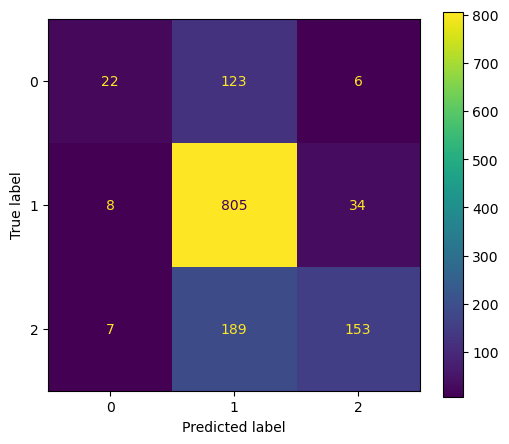

In [111]:
cm = confusion_matrix(y_test,  y_pred_rf_r2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
fig, ax = plt.subplots(figsize=(6,5))
disp.plot(ax=ax, values_format='d')
plt.show()

In [107]:
print(classification_report(y_test, y_pred_rf_r2))

              precision    recall  f1-score   support

           0       0.59      0.15      0.23       151
           1       0.72      0.95      0.82       847
           2       0.79      0.44      0.56       349

    accuracy                           0.73      1347
   macro avg       0.70      0.51      0.54      1347
weighted avg       0.73      0.73      0.69      1347



In [108]:
columns_rf2_ = df2.columns[:-1].values

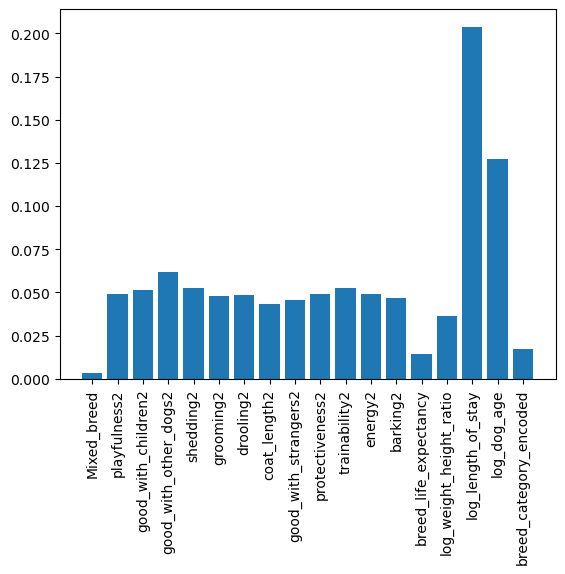

In [109]:
plt.bar(columns_rf2_, best_rf_r.feature_importances_)
plt.xticks(rotation=90)
plt.show()

Anche con questo modello con diversi parametri le feature più importanti sono la durata della permanenza e gli anni del cane e variabili relative al comportamento come la socievolezza con gli altri cani

## SVM
- find the best parameters
- evaluate the model

Per ottimizzare i tempi e adoperare più parametri ho impostato la crossa validation su 5. 

Ho cercato di condurre sia una ricerca più esaustiva con la GridSearchCV limitando il numero e la grandezza dei vari parametri (in particolare di C), allo stesso tempo ho provato anche la RandomizedSearchCV dopo aver visto che il modello non performa bene nel prevedere la classe 0. 

Per la RandomizedSearchCV ho variato le iterazioni all'inizio avevo impostato 20, poi 10 ma per ragioni di tempistiche e di computazione ho provato con 5 e ho lasciato solo questo tentativo nel codice sottostante.

In [92]:
svm = SVC()

In [93]:
%%time
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf','poly'],  
    'gamma': ['scale',  0.01, 0.1] 
}


grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print('Parametri migliori:', grid_search.best_params_)

Parametri migliori: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
CPU times: total: 15.5 s
Wall time: 31min 49s


In [94]:
best_svm = grid_search.best_estimator_

In [95]:
y_pred = best_svm.predict(X_test)

In [96]:
print(classification_report(y_test, y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       151
           1       0.67      0.98      0.80       847
           2       0.77      0.27      0.40       349

    accuracy                           0.68      1347
   macro avg       0.48      0.41      0.40      1347
weighted avg       0.62      0.68      0.60      1347



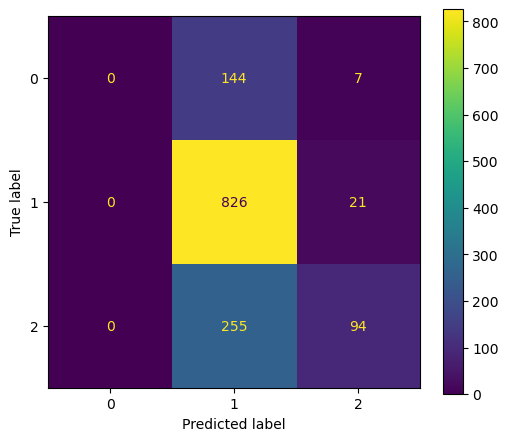

In [97]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
fig, ax = plt.subplots(figsize=(6,5))
disp.plot(ax=ax, values_format='d')
plt.show()

In [125]:
%%time

param_dist_svm2 = {
    'C': [0.1, 1, 10],  
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}


svm2 = SVC(random_state=42)


random_search_svm2 = RandomizedSearchCV(
    svm2, param_distributions=param_dist_svm2, n_iter=5, 
    cv=5, scoring='accuracy', n_jobs=-1, random_state=42
)


random_search_svm2.fit(X_train, y_train)


print('Migliori parametri:', random_search_svm2.best_params_)


best_svm2 = random_search_svm2.best_estimator_
y_pred_svm2 = best_svm2.predict(X_test)

print(classification_report(y_test, y_pred_svm2,zero_division=0))

Migliori parametri: {'kernel': 'linear', 'gamma': 1, 'C': 1}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       151
           1       0.66      0.98      0.79       847
           2       0.78      0.19      0.30       349

    accuracy                           0.67      1347
   macro avg       0.48      0.39      0.36      1347
weighted avg       0.62      0.67      0.57      1347

CPU times: total: 3.22 s
Wall time: 6.27 s


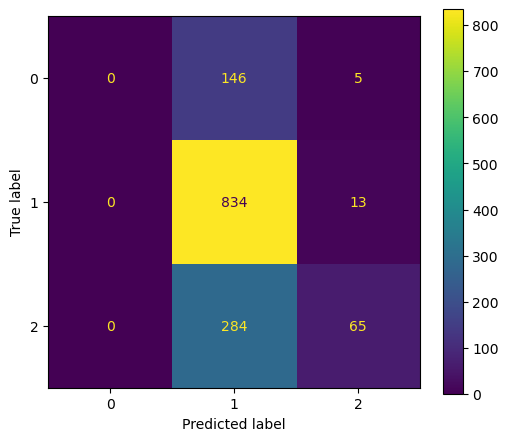

In [128]:
cm = confusion_matrix(y_test, y_pred_svm2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
fig, ax = plt.subplots(figsize=(6,5))
disp.plot(ax=ax, values_format='d')
plt.show()

Il modello falllisce sempre nel classificare la classe.
Anche in questo caso classifica con alti punteggi di recall,precision e f1 la classe 1 e con punteggio poco ottimale nelle metriche già menzionate la classe 2

## Wrap Up
- comment on your findings:
    - which model performed best?
    - which are the most important features?
    - which are the most difficult classes to predict?
- can you say something about the outcome of a dog?

Il modello con la performance migliore è stato il Random Forest, le feature più importanti per classificare l'outcome dei cani sono secondo questo modello sono la lunghezza della permanenza nel rifiugio, gli anni del cane, e una serie di caratteristiche comportamentali come l'essere socievole con gli altri cani  (lenght_of_stay,log_dog_age,good_with_other_dogs2). 

Queste feature come gli anni e la socievolezza con gli altri cani sono risultate rilevanti anche per il Decision Tree Classifier. 

La classe più diffiicile da predire come mostrano tutti i punteggi di f1,recall e precision dei vari modelli, in particolare per KNN e SVM,  è la Classe 0,  che comprende gli esiti più negativi per il cane, seguita dalla Classe 2.

Questo è dovuto al fatto che la Classe 0 è meno numerosa delle altre. Ad esempio la Classe 1, associata all'outcome Transfer, è predetta meglio essendo più rappresentata nei dati.

Anche per la Classe 2 le metriche nel miglior modello ottenuto, cioè il Random Forest, non sono del tutto ottimali (precision=0.78, recall= 0.45, f1 score= 0.57).

Il Random Forest predice in maniera ottimale la classe 1 (precision= 0.72, recall= 0.95,f1 score= 0.82).
Si può affermare che fattori anagrafici e  comportamentali e il tempo di permanenza (lenght_of_stay,log_dog_age,good_with_other_dogs2) influiscono sulla probabilità  di trasferimento dei cani. 

A livello di accuracy il modello migliore risulta il Random Forest (accuracy=0.73), seguito dal Decision tre classifier(accuracy=0.70), KNN (accuracy=0.68) e dal SVM ((accuracy=0.62), quest'ultimo con un punteggio peggiore del Dummy Classifier evidenziando che non sia il modello più adatto per questo tipo di problema di classificazione.

Lo sbilanciamento delle classi è il fattore da ottimizzare per avere modelli migliori.
